In [1]:
import pandas as pd

In [2]:
df = pd.read_csv('olimpic_medals.xls')
df.head()

,City,Edition,Sport,Discipline,Athlete,NOC,Gender,Event,Event_gender,Medal
0,Athens,1896,Aquatics,Swimming,"HAJOS, Alfred",HUN,Men,100m freestyle,M,Gold
1,Athens,1896,Aquatics,Swimming,"HERSCHMANN, Otto",AUT,Men,100m freestyle,M,Silver
2,Athens,1896,Aquatics,Swimming,"DRIVAS, Dimitrios",GRE,Men,100m freestyle for sailors,M,Bronze
3,Athens,1896,Aquatics,Swimming,"MALOKINIS, Ioannis",GRE,Men,100m freestyle for sailors,M,Gold
4,Athens,1896,Aquatics,Swimming,"CHASAPIS, Spiridon",GRE,Men,100m freestyle for sailors,M,Silver


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 29216 entries, 0 to 29215
Data columns (total 10 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   City          29216 non-null  object
 1   Edition       29216 non-null  int64 
 2   Sport         29216 non-null  object
 3   Discipline    29216 non-null  object
 4   Athlete       29216 non-null  object
 5   NOC           29216 non-null  object
 6   Gender        29216 non-null  object
 7   Event         29216 non-null  object
 8   Event_gender  29216 non-null  object
 9   Medal         29216 non-null  object
dtypes: int64(1), object(9)
memory usage: 2.2+ MB


### 1. Сколько медалей выиграл Jesse Owens в 1936?

In [4]:
df['Athlete'].head()

0         HAJOS, Alfred
1      HERSCHMANN, Otto
2     DRIVAS, Dimitrios
3    MALOKINIS, Ioannis
4    CHASAPIS, Spiridon
Name: Athlete, dtype: object

In [5]:
df.loc[(df['Athlete'] == 'OWENS, Jesse') & (df['Edition'] == 1936)]

,City,Edition,Sport,Discipline,Athlete,NOC,Gender,Event,Event_gender,Medal
6427,Berlin,1936,Athletics,Athletics,"OWENS, Jesse",USA,Men,100m,M,Gold
6439,Berlin,1936,Athletics,Athletics,"OWENS, Jesse",USA,Men,200m,M,Gold
6456,Berlin,1936,Athletics,Athletics,"OWENS, Jesse",USA,Men,4x100m relay,M,Gold
6523,Berlin,1936,Athletics,Athletics,"OWENS, Jesse",USA,Men,long jump,M,Gold


In [6]:
len(df.loc[(df['Athlete'] == 'OWENS, Jesse') & (df['Edition'] == 1936)])

4

**Ответ: 4 медали**

### 2. Какая страна выиграла большинство золотых медалей мужчинами в бадминтоне?

In [7]:
df.loc[df['Discipline'].str.startswith('B')]['Discipline'].unique()

array(['Basque Pelota', 'Boxing', 'Basketball', 'Badminton', 'Baseball',
       'Beach volley.', 'BMX'], dtype=object)

In [8]:
df['Medal'].value_counts()

Gold      9850
Bronze    9689
Silver    9677
Name: Medal, dtype: int64

In [9]:
df['Gender'].value_counts()

Men      21721
Women     7495
Name: Gender, dtype: int64

In [10]:
men_badminton_gold = df.loc[
    (df['Discipline'] == 'Badminton')
    & (df['Medal'] == 'Gold')
    & (df['Gender'] == 'Men')
]

men_badminton_gold.head()

,City,Edition,Sport,Discipline,Athlete,NOC,Gender,Event,Event_gender,Medal
20031,Barcelona,1992,Badminton,Badminton,"KIM, Moon-Soo",KOR,Men,doubles,M,Gold
20032,Barcelona,1992,Badminton,Badminton,"PARK, Joo-Bong",KOR,Men,doubles,M,Gold
20045,Barcelona,1992,Badminton,Badminton,"BUDI KUSUMA, Alan",INA,Men,singles,M,Gold
21771,Atlanta,1996,Badminton,Badminton,"MAINAKY, Rexy Ronald",INA,Men,doubles,M,Gold
21772,Atlanta,1996,Badminton,Badminton,"SUBAGJA, Ricky Achmad",INA,Men,doubles,M,Gold


In [11]:
men_badminton_gold.groupby('NOC')['Medal'].count().sort_values(ascending=0)

NOC
INA    8
KOR    6
CHN    4
DEN    1
Name: Medal, dtype: int64

**Ответ: Индонезия, 8 медалей**

### 3. Какие три страны выиграли большинство медалей в последние годы (с 1984 по 2008)?

In [12]:
df[
    (df['Edition'] >= 1984)
    & (df['Edition'] <= 2008)
].groupby('NOC')['Medal'].count().sort_values(ascending=0)

NOC
USA    1837
AUS     762
GER     691
CHN     679
RUS     638
       ... 
DJI       1
CIV       1
BDI       1
BAR       1
KUW       1
Name: Medal, Length: 124, dtype: int64

**Ответ: США, Австралия, Германия**

### 4. Покажите мужчин золотых медалистов по 100m. Выведите результаты по убыванию года выйгрыша. Покажите город в котором проходила олимпиада, год, имя атлета и страну, за которую он выступал

In [13]:
df.head()

,City,Edition,Sport,Discipline,Athlete,NOC,Gender,Event,Event_gender,Medal
0,Athens,1896,Aquatics,Swimming,"HAJOS, Alfred",HUN,Men,100m freestyle,M,Gold
1,Athens,1896,Aquatics,Swimming,"HERSCHMANN, Otto",AUT,Men,100m freestyle,M,Silver
2,Athens,1896,Aquatics,Swimming,"DRIVAS, Dimitrios",GRE,Men,100m freestyle for sailors,M,Bronze
3,Athens,1896,Aquatics,Swimming,"MALOKINIS, Ioannis",GRE,Men,100m freestyle for sailors,M,Gold
4,Athens,1896,Aquatics,Swimming,"CHASAPIS, Spiridon",GRE,Men,100m freestyle for sailors,M,Silver


In [15]:
df.loc[df['Event'].str.contains('100m')]['Event'].value_counts()

4x100m relay                              504
4x100m freestyle relay                    438
4x100m medley relay                       387
100m freestyle                            142
100m                                      136
100m backstroke                           130
100m butterfly                             75
100m breaststroke                          66
100m running deer, single shots, team      51
100m running deer, double shots, team      33
100m hurdles                               31
100m running deer, double shots            12
100m running deer, single shots            12
100m running deer, single/double shots      6
100m freestyle for sailors                  3
Name: Event, dtype: int64

In [16]:
df[
    (df['Gender'] == 'Men')
    & (df['Medal'] == 'Gold')
    & (df['Event'] == '100m')
][['City', 'Edition',
    'Athlete', 'NOC']].sort_values(by='Edition', ascending=0)

,City,Edition,Athlete,NOC
27552,Beijing,2008,"BOLT, Usain",JAM
25539,Athens,2004,"GATLIN, Justin",USA
23521,Sydney,2000,"GREENE, Maurice",USA
21598,Atlanta,1996,"BAILEY, Donovan",CAN
19859,Barcelona,1992,"CHRISTIE, Linford",GBR
18284,Seoul,1988,"LEWIS, Carl",USA
16794,Los Angeles,1984,"LEWIS, Carl",USA
15374,Moscow,1980,"WELLS, Allan",GBR
14069,Montreal,1976,"CRAWFORD, Hasely",TRI
12902,Munich,1972,"BORZOV, Valery",URS


### 5. Как много медалей было выиграно мужчинами и женщинами в истории олимпиады. Как много золотых, серебрянных и бронзовых медалей было выиграно каждым полом?

In [17]:
df.groupby('Gender')['Medal'].value_counts().sort_index()

Gender  Medal 
Men     Bronze    7175
        Gold      7365
        Silver    7181
Women   Bronze    2514
        Gold      2485
        Silver    2496
Name: Medal, dtype: int64

### 6. Используя groupby(), постройте график числа всех медалей, выйгранных на каждой олимпиаде.

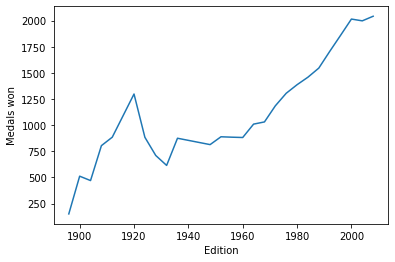

In [21]:
ax = df.groupby('Edition')['Medal'].count().plot()
ax.set_ylabel('Medals won');

### 7. Создайте список, показывающий число всех медалей, выигранных каждой страной в течение всей истории олимпийских игр. Для каждой страны необходимо показать год первой и последней заработанной медали.

In [22]:
medals_per_country = pd.DataFrame(
    df.groupby('NOC')['Medal'].count().sort_values())

medals_per_country.head()

,Medal
NOC,
AFG,1
MRI,1
MKD,1
KUW,1
ISV,1


In [23]:
medals_per_country['First_medal_year'] = df.groupby('NOC')['Edition'].min()
medals_per_country['Last_medal_year'] = df.groupby('NOC')['Edition'].max()

In [24]:
medals_per_country.tail(8)

,Medal,First_medal_year,Last_medal_year
NOC,,,
HUN,1053,1896,2008
AUS,1075,1896,2008
GER,1211,1896,2008
ITA,1228,1900,2008
FRA,1314,1896,2008
GBR,1594,1896,2008
URS,2049,1952,1988
USA,4335,1896,2008


### 8. Атлеты, выйгравшие медали в Beijing на дистанции 100m или 200m

In [25]:
df[
    (df['City'] == 'Beijing')
    & ((df['Event'] == '100m') | (df['Event'] == '200m'))
]['Athlete']

27551                 DIX, Walter
27552                 BOLT, Usain
27553           THOMPSON, Richard
27554          FRASER, Shelly-ann
27555            SIMPSON, Sherone
27556             STEWART, Kerron
27569                 DIX, Walter
27570                 BOLT, Usain
27571             CRAWFORD, Shawn
27572             STEWART, Kerron
27573    CAMPBELL-BROWN, Veronica
27574              FELIX, Allyson
Name: Athlete, dtype: object

### 9. Постройте график числа золотых медалей выйгранных США мужчинами и женщинами в атлетике

<AxesSubplot:ylabel='Medal'>

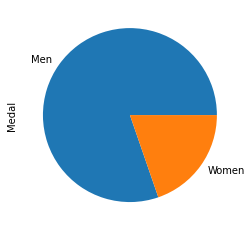

In [26]:
df[
    (df['Discipline'] == 'Athletics')
    & (df['NOC'] == 'USA')
    & (df['Medal'] == 'Gold')
].groupby('Gender')['Medal'].count().plot.pie()

### 10. Постройте график 5 атлетов, которые выйграли большинство золотых медалей.

<AxesSubplot:xlabel='Athlete'>

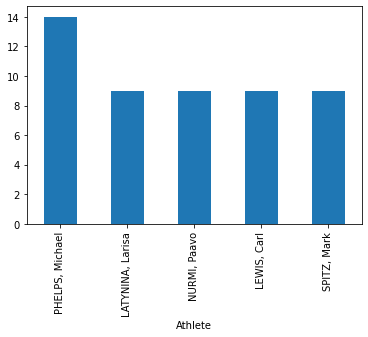

In [27]:
df[
    df['Medal'] == 'Gold'
].groupby('Athlete')['Medal'].count()\
    .sort_values(ascending=0).head(5).plot.bar()

### 11. Покажите суммарное количество медалей выигранных странами в последних олимпийских играх.

In [28]:
df[df['Edition'] == df['Edition'].max()]

,City,Edition,Sport,Discipline,Athlete,NOC,Gender,Event,Event_gender,Medal
27174,Beijing,2008,Aquatics,Diving,"GALPERIN, Gleb",RUS,Men,10m platform,M,Bronze
27175,Beijing,2008,Aquatics,Diving,"MITCHAM, Matthew",AUS,Men,10m platform,M,Gold
27176,Beijing,2008,Aquatics,Diving,"ZHOU, Luxin",CHN,Men,10m platform,M,Silver
27177,Beijing,2008,Aquatics,Diving,"WANG, Xin",CHN,Women,10m platform,W,Bronze
27178,Beijing,2008,Aquatics,Diving,"CHEN, Ruolin",CHN,Women,10m platform,W,Gold
...,...,...,...,...,...,...,...,...,...,...
29211,Beijing,2008,Wrestling,Wrestling Gre-R,"ENGLICH, Mirko",GER,Men,84 - 96kg,M,Silver
29212,Beijing,2008,Wrestling,Wrestling Gre-R,"MIZGAITIS, Mindaugas",LTU,Men,96 - 120kg,M,Bronze
29213,Beijing,2008,Wrestling,Wrestling Gre-R,"PATRIKEEV, Yuri",ARM,Men,96 - 120kg,M,Bronze
29214,Beijing,2008,Wrestling,Wrestling Gre-R,"LOPEZ, Mijain",CUB,Men,96 - 120kg,M,Gold


In [29]:
df[df['Edition'] == df['Edition'].max()].groupby(
    'NOC')['Medal'].count().sort_values()

NOC
AFG      1
CMR      1
PAN      1
CHI      1
ECU      1
      ... 
GER    101
RUS    143
AUS    149
CHN    184
USA    315
Name: Medal, Length: 86, dtype: int64

In [30]:
df[df['Edition'] == df['Edition'].max()].groupby(
    'NOC')['Medal'].value_counts().sort_values()

NOC  Medal 
AFG  Bronze      1
MAS  Silver      1
MAR  Silver      1
     Bronze      1
LAT  Silver      1
              ... 
CHN  Gold       74
AUS  Bronze     76
USA  Bronze     81
     Silver    109
     Gold      125
Name: Medal, Length: 188, dtype: int64

### 12. Постройте таблицу, в которой по годам всех олимпиад покажите топовых атлетов США(1 атлет на год) по общему количеству медалей. Включите дисциплину атлета

In [31]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 29216 entries, 0 to 29215
Data columns (total 10 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   City          29216 non-null  object
 1   Edition       29216 non-null  int64 
 2   Sport         29216 non-null  object
 3   Discipline    29216 non-null  object
 4   Athlete       29216 non-null  object
 5   NOC           29216 non-null  object
 6   Gender        29216 non-null  object
 7   Event         29216 non-null  object
 8   Event_gender  29216 non-null  object
 9   Medal         29216 non-null  object
dtypes: int64(1), object(9)
memory usage: 2.2+ MB


In [32]:
us_athletes = df[df['NOC'] == 'USA'].groupby(['Edition', 'Athlete'])\
    .agg({'Discipline': 'first', 'Medal': 'count'}).reset_index()
us_athletes

,Edition,Athlete,Discipline,Medal
0,1896,"BLAKE, Arthur",Athletics,1
1,1896,"BURKE, Thomas",Athletics,2
2,1896,"CLARK, Ellery",Athletics,2
3,1896,"CONNOLLY, James",Athletics,3
4,1896,"CURTIS, Thomas",Athletics,1
...,...,...,...,...
3544,2008,"WILLOUGHBY, Kim",Volleyball,1
3545,2008,"WINDES, Elsie",Water polo,1
3546,2008,"WINEBERG, Mary",Athletics,1
3547,2008,"WRIGHT, Adam",Water polo,1


In [33]:
us_athletes.sort_values(['Edition', 'Medal'],
                        ascending=[1, 0]
                        ).groupby('Edition').head(1)

,Edition,Athlete,Discipline,Medal
5,1896,"GARRETT, Robert",Athletics,4
14,1900,"BAXTER, Irving",Athletics,5
101,1904,"DOWNING, Burton",Cycling Track,6
362,1908,"SHEPPARD, Melvin",Athletics,3
421,1912,"OSBURN, Carl Townsend",Shooting,4
506,1920,"LEE, Willis",Shooting,7
733,1924,"WEISSMULLER, Johnny",Swimming,4
748,1928,"BARBUTI, Raymond James",Athletics,2
859,1932,"DIDRIKSON, Mildred",Athletics,3
1028,1936,"OWENS, Jesse",Athletics,4
